<a href="https://colab.research.google.com/github/groupsvkg/ai/blob/main/pytorch_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

# Download MNIST dataset

In [13]:
dataset = MNIST(root='data/', download=True)
len(dataset)

60000

# Load test data

In [3]:
test_dataset =MNIST(root='data/', train=False)
len(test_dataset)

10000

# Display single image

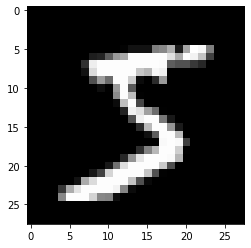

In [4]:
dataset[0]

import matplotlib.pyplot as plt
image, label = dataset[0]

plt.imshow(image, cmap='gray')

# Transform data to Tensors

In [5]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/', 
                train=True, 
                transform=transforms.ToTensor())

torch.Size([1, 28, 28]) 5
tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


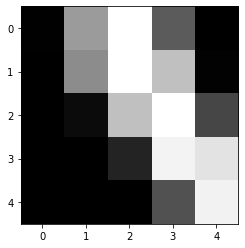

In [6]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
print(img_tensor[0, 10:15, 10:15])
plt.imshow(img_tensor[0, 10:15, 10:15].numpy(), cmap='gray')

# Split Data Randomly
*   Training Dataset: 50000
*   Validation Dataset: 10000



In [7]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

# Load data in batches

In [8]:
from torch.utils.data import DataLoader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [9]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)

In [10]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0098,  0.0232, -0.0028,  ...,  0.0077,  0.0061, -0.0354],
        [ 0.0021,  0.0036,  0.0166,  ...,  0.0180,  0.0166, -0.0146],
        [ 0.0098, -0.0135, -0.0155,  ..., -0.0006,  0.0182,  0.0326],
        ...,
        [-0.0190, -0.0350, -0.0165,  ..., -0.0149,  0.0140, -0.0320],
        [-0.0342, -0.0047,  0.0322,  ...,  0.0165, -0.0079, -0.0275],
        [-0.0029, -0.0159,  0.0034,  ...,  0.0292, -0.0284, -0.0045]],
       requires_grad=True)

In [11]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0163, -0.0333, -0.0082,  0.0054,  0.0235,  0.0181, -0.0212, -0.0056,
         0.0124, -0.0102], requires_grad=True)

In [12]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images.reshape(128, 28*28))
  print(outputs)
  break

tensor([5, 0, 4, 1, 4, 1, 4, 7, 6, 7, 6, 7, 4, 5, 1, 4, 1, 5, 9, 1, 0, 3, 0, 5,
        3, 4, 8, 1, 9, 4, 8, 1, 2, 1, 7, 8, 9, 5, 0, 2, 2, 0, 5, 3, 3, 5, 3, 1,
        1, 0, 8, 8, 8, 7, 9, 5, 6, 5, 5, 9, 7, 4, 2, 8, 8, 6, 3, 7, 5, 2, 2, 6,
        0, 2, 4, 3, 0, 3, 3, 6, 3, 9, 7, 2, 0, 4, 5, 5, 3, 5, 4, 1, 5, 7, 4, 8,
        4, 9, 0, 1, 4, 1, 7, 5, 9, 6, 9, 1, 0, 0, 4, 9, 6, 4, 5, 4, 5, 1, 2, 6,
        3, 2, 1, 6, 6, 7, 4, 2])
torch.Size([128, 1, 28, 28])
tensor([[-0.1095,  0.0747,  0.0568,  ..., -0.0101, -0.1666, -0.1313],
        [-0.0777,  0.2187,  0.4564,  ...,  0.1314,  0.0703,  0.2413],
        [ 0.1190,  0.1191, -0.0211,  ...,  0.3751, -0.1477, -0.2743],
        ...,
        [ 0.0699,  0.2584, -0.1356,  ..., -0.0352, -0.1896, -0.3182],
        [ 0.1355,  0.0688,  0.1479,  ...,  0.3083, -0.0154, -0.0619],
        [ 0.1598,  0.1063,  0.4204,  ..., -0.0094,  0.2651,  0.1819]],
       grad_fn=<AddmmBackward>)
